Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Accuracy: 0.59375


C:\Users\nh013\AppData\Local\Temp\ipykernel_12884\263951400.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\nh013\AppData\Local\Temp\ipykernel_12884\263951400.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']
C:\Users\nh013\AppData\Local\Temp\ipykernel_12884\263951400.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

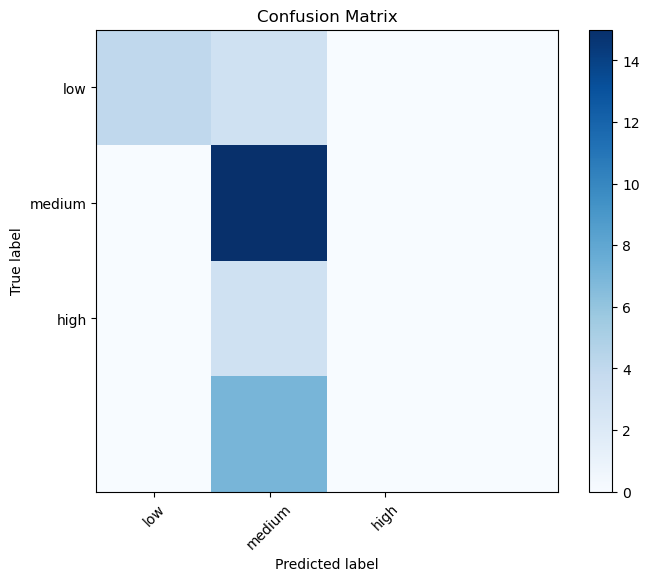

In [8]:
# use logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")


# Feature selection
df = df[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]


# Identify missing data
print(df.isnull().sum())


# Drop rows with missing values
df.dropna(inplace=True)


# Fill missing value with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)


# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)


# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# Handle outliers
df = handle_outliers(df, 'Happiness Score')


# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])


# Encode categorical region variable
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])


# Drop any unnecessary columns
df.drop(['Dystopia Residual'], axis=1, inplace=True)


# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']


# Bin the happiness score into different categories (low, medium, high)
bins = [-1, 0.5, 1, 2]
labels = ['low', 'medium', 'high']
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)


# Encode categorical target variable
le = LabelEncoder()
df['Happiness Category'] = le.fit_transform(df['Happiness Category'])

# Split the data into train and test sets
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()





Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\1237549576.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\1237549576.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']
C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\1237549576.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Mean squared error: 0.003536118859185148
R^2 score: 0.9967530021455724


C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\1237549576.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Predicted Happiness Score per Economy'] = y_pred


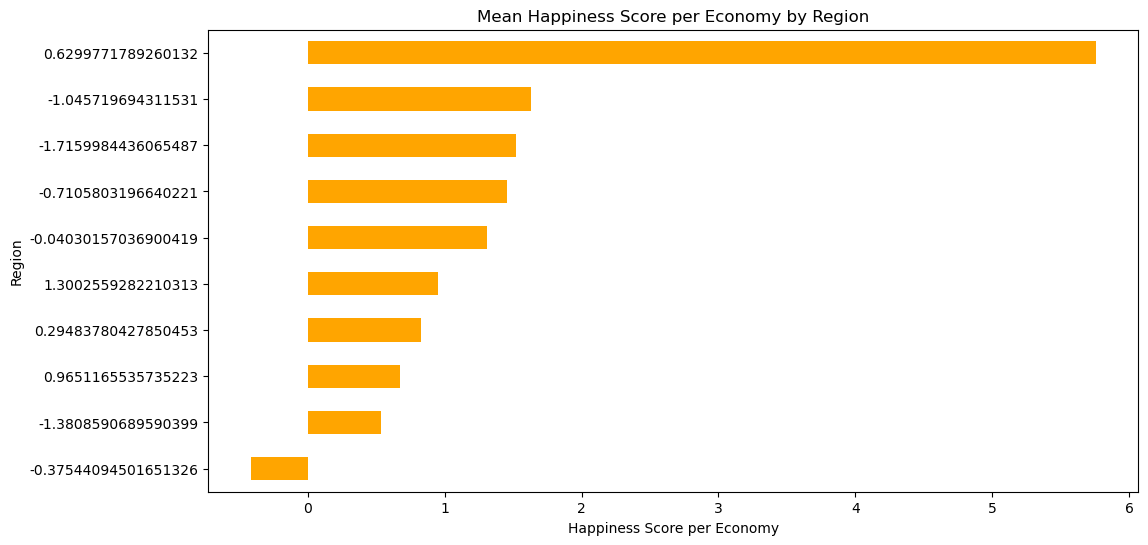

In [4]:

# use random forest model to predict happiness score with plot 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,r2_score
import seaborn as sns



# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")


# Feature selection
df = df[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]


# Identify missing data
print(df.isnull().sum())


# Drop rows with missing values
df.dropna(inplace=True)


# Fill missing value with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)


# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)


# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# Handle outliers
df = handle_outliers(df, 'Happiness Score')


# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])


# Encode categorical region variable
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])


# Drop any unnecessary columns
df.drop(['Dystopia Residual'], axis=1, inplace=True)


# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']


# Bin the happiness score into different categories (low, medium, high)
bins = [-1, 0.5, 1, 2]
labels = ['low', 'medium', 'high']
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)


# Encode categorical target variable
le = LabelEncoder()
df['Happiness Category'] = le.fit_transform(df['Happiness Category'])

# Split the data into train and test sets
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model to training data
rfc.fit(X_train, y_train)

# Make predictions on testing data
y_pred = rfc.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R^2 score:', r2)

# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# Group the data by region and calculate the mean happiness score per economy
mean_happiness_per_economy = df.groupby('Region')['Happiness Score per Economy'].mean()

# Use the trained random forest model to predict happiness scores per economy for each country
df_pred = df.drop(['Happiness Score'], axis=1)
y_pred = rfc.predict(df_pred)

# Add the predicted happiness scores per economy to the dataframe
df['Predicted Happiness Score per Economy'] = y_pred

# Plot the mean happiness score per economy for each region
plt.figure(figsize=(12,6))
mean_happiness_per_economy.sort_values().plot(kind='barh', color='orange')
plt.title('Mean Happiness Score per Economy by Region')
plt.xlabel('Happiness Score per Economy')
plt.ylabel('Region')

# Get the tick labels and replace with region names
tick_labels = plt.gca().get_yticklabels()
region_names = df['Region'].unique()
plt.gca().set_yticklabels(region_names)

plt.show()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\2275432701.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\2275432701.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']
C:\Users\nh013\AppData\Local\Temp\ipykernel_1440\2275432701.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

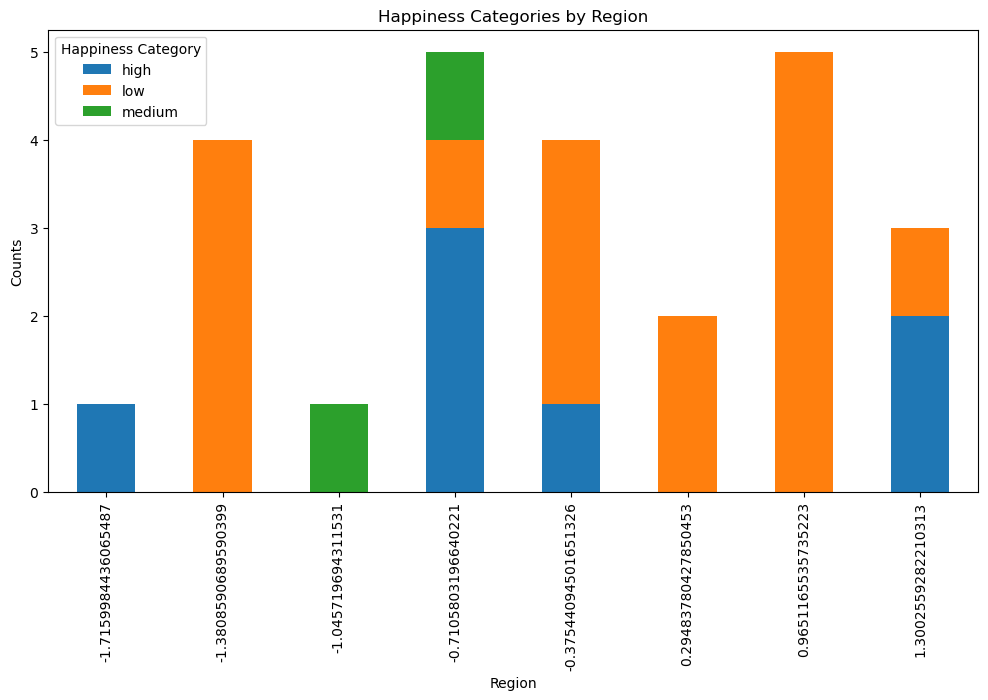

In [5]:
# plot happiness categories by region in random forest model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,r2_score
import seaborn as sns



# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")


# Feature selection
df = df[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]


# Identify missing data
print(df.isnull().sum())


# Drop rows with missing values
df.dropna(inplace=True)


# Fill missing value with mean or median
mean = df.mean()
df.fillna(mean, inplace=True)


# Fill missing values with mode
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)


# Fill missing values with backward fill
df.fillna(method='bfill', inplace=True)


# Handle outliers
df = handle_outliers(df, 'Happiness Score')


# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])


# Encode categorical region variable
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])


# Drop any unnecessary columns
df.drop(['Dystopia Residual'], axis=1, inplace=True)


# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# Calculate the happiness score of each country over the economy
df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']


# Bin the happiness score into different categories (low, medium, high)
bins = [-1, 0.5, 1, 2]
labels = ['low', 'medium', 'high']
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)


# Encode categorical target variable
le = LabelEncoder()
df['Happiness Category'] = le.fit_transform(df['Happiness Category'])

# Split the data into train and test sets
X = df.drop(['Happiness Category'], axis=1)
y = df['Happiness Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model to training data
rfc.fit(X_train, y_train)

# Make predictions on testing data
y_pred = rfc.predict(X_test)

# Convert the predicted happiness category back to the original labels
y_pred = le.inverse_transform(np.round(y_pred).astype(int))

# Add predicted happiness category to the test set
X_test['Happiness Category'] = y_pred

# Group the test data by region and happiness category
grouped = X_test.groupby(['Region', 'Happiness Category']).size().reset_index(name='Counts')

# Pivot the data to create a stacked bar chart
pivot = grouped.pivot(index='Region', columns='Happiness Category', values='Counts')
pivot.plot(kind='bar', stacked=True, figsize=(12,6))

# Set the chart title and labels
plt.title('Happiness Categories by Region')
plt.xlabel('Region')
plt.ylabel('Counts')

# Show the chart
plt.show()


SVR R-squared score: 0.997


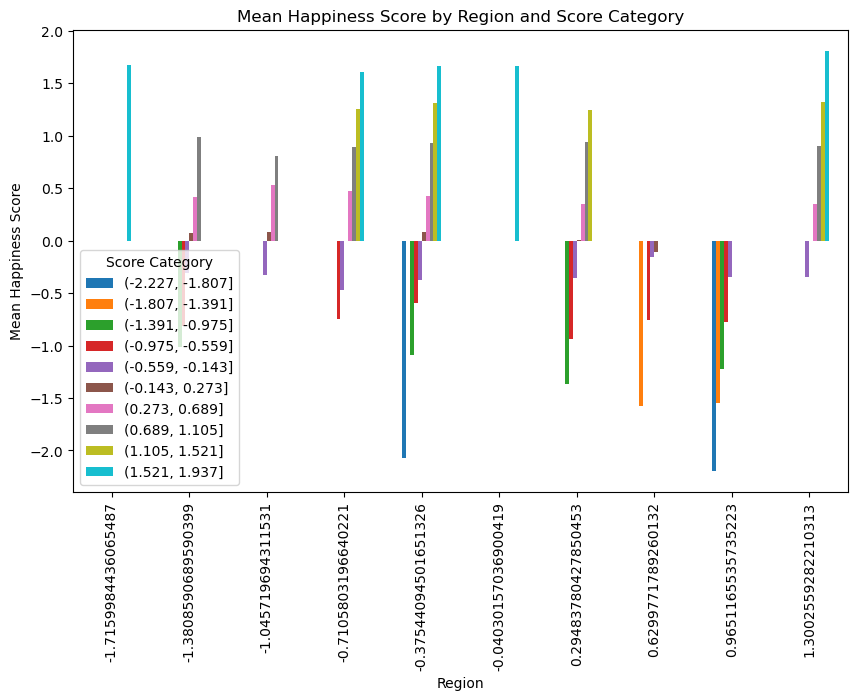

In [7]:
# use (SVR) support vector regression MODEL  to predict happiness score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

# Feature selection
df = df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any rows with missing values
df.dropna(inplace=True)

# Handle outliers
df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using label encoding
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])

# Convert categorical variables into numeric variables using label encoding
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])


# Normalize and scale all numerical columns
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split the data into training and testing sets
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"SVR R-squared score: {r2:.3f}")



# Convert y-axis values to categorical variable
bins = pd.cut(df['Happiness Score'], bins=10)
df['Score Category'] = bins

# Group by Region and Score Category, and calculate the mean score
grouped = df.groupby(['Region', 'Score Category'])['Happiness Score'].mean().reset_index()

# Create a bar plot of mean scores by region and score category
fig, ax = plt.subplots(figsize=(10,6))
grouped.pivot(index='Region', columns='Score Category', values='Happiness Score').plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Happiness Score')
ax.set_title('Mean Happiness Score by Region and Score Category')
plt.show()

